In [ ]:
pip install tensorflow keras matplotlib opencv-python scikit-learn


In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nidhisingh1858","key":"d1f5bd1ffe340ab7f8b66a023c89b01f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp 'kaggle (1).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images


Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other
 77% 81.0M/105M [00:00<00:00, 140MB/s]
100% 105M/105M [00:00<00:00, 170MB/s] 


['test', 'train']
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 287s 182ms/step - accuracy: 0.7296 - loss: 0.5176 - val_accuracy: 0.8475 - val_loss: 0.3439
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 267s 171ms/step - accuracy: 0.8454 - loss: 0.3516 - val_accuracy: 0.8598 - val_loss: 0.3231
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 272s 174ms/step - accuracy: 0.8655 - loss: 0.3108 - val_accuracy: 0.8816 - val_loss: 0.2797
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 326s 176ms/step - accuracy: 0.8803 - loss: 0.2851 - val_accuracy: 0.8895 - val_loss: 0.2644
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 275s 176ms/step - accuracy: 0.8867 - loss: 0.2709 - val_accuracy: 0.8888 - val_loss: 0.2626
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 173ms/step - accuracy: 0.8926 - loss: 0.2584 - val_accuracy: 0.8984 - val_loss: 0.2437
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 342s 185ms/step - accuracy: 0.8982 - loss: 0.2463 - val_accuracy: 0.9024 - val_loss: 0.2358
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 279s 178ms/step - accuracy: 0.9

Test accuracy: 0.9042


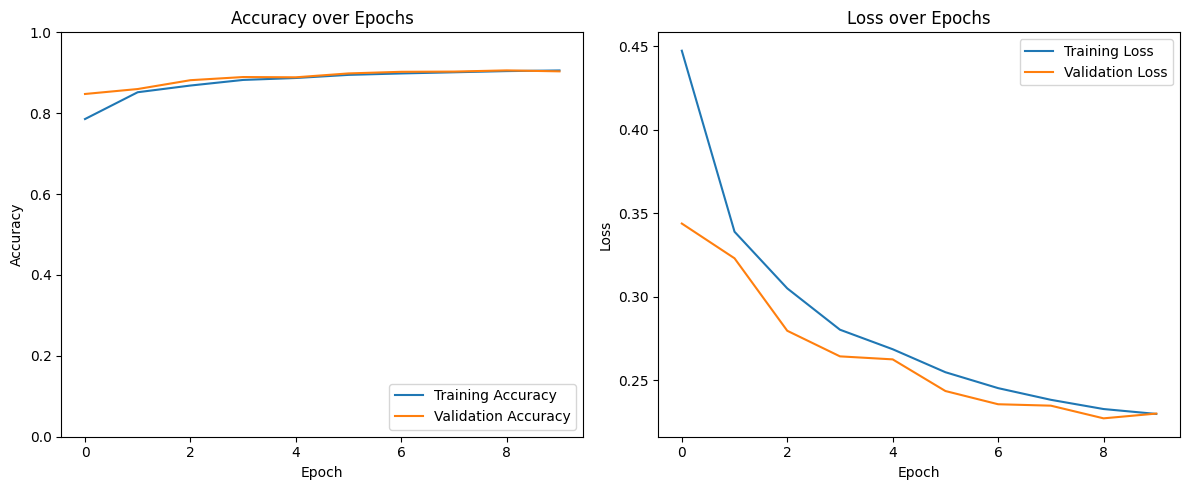

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

zip_file_path = '/content/cifake-real-and-ai-generated-synthetic-images.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/cifake_dataset')

print(os.listdir('/content/cifake_dataset'))

train_dir = '/content/cifake_dataset/train'
test_dir = '/content/cifake_dataset/test'

image_size = (32, 32)
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_data_gen = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_data_gen, epochs=10, validation_data=test_data_gen, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(test_data_gen)
print(f'Test accuracy: {test_acc:.4f}')

model.save('/content/cifake_model.h5')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = load_model('/content/cifake_model.h5')

image_path = '/content/IMG_0022.JPG'

def preprocess_image(image_path, target_size=(32, 32)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

image_array = preprocess_image(image_path)

prediction = model.predict(image_array)
print(prediction)
if prediction > 0.01:
    print("The image is classified as: Fake")
else:
    print("The image is classified as: Real")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[3.816655e-06]]
The image is classified as: Real


In [ ]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
model = load_model('/content/cifake_model.h5')

# Directory containing the "real" images in the test dataset
real_dir = '/content/cifake_dataset/test/FAKE'

# Preprocess an image
def preprocess_image(image_path, target_size=(32, 32)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# List all image files in the "real" directory
real_images = sorted(os.listdir(real_dir))[:20]  # Get the first 20 images

# Predict and print results for each image
for i, image_name in enumerate(real_images):
    image_path = os.path.join(real_dir, image_name)
    image_array = preprocess_image(image_path)
    prediction = model.predict(image_array)

    # Interpret and print the prediction
    label = "Real" if prediction[0] > 0.5 else "Fake"
    print(f"Image {i+1} ({image_name}): {label}, Prediction Score: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Image 1 (0 (10).jpg): Fake, Prediction Score: 0.0020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 2 (0 (2).jpg): Fake, Prediction Score: 0.0012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image 3 (0 (3).jpg): Fake, Prediction Score: 0.0075
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 4 (0 (4).jpg): Fake, Prediction Score: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 5 (0 (5).jpg): Fake, Prediction Score: 0.0003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 6 (0 (6).jpg): Fake, Prediction Score: 0.0025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image 7 (0 (7).jpg): Fake, Prediction Score: 0.0002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 8 (0 (8).jpg): Fake, Prediction Score: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 9 (0 (9).jpg): Fake, Prediction Score: 0.0002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image 10 (0.jpg): Fake, Prediction Score: 0.0097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 11 (1 (10).jpg): Fake, Prediction Score: 0.0091
1/1 ━━━━━

In [ ]:
test_acc1=0.9304

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step


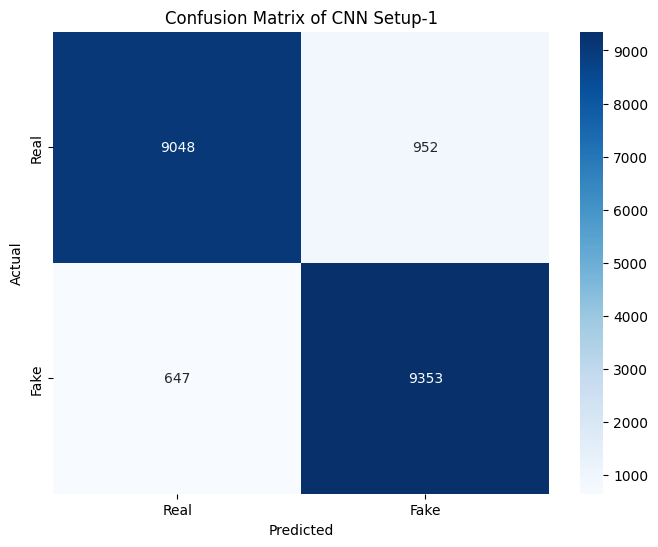

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_labels = test_data_gen.classes
predictions = model.predict(test_data_gen)
predicted_classes = np.round(predictions).astype(int).flatten()

cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of CNN Setup-1')
plt.show()

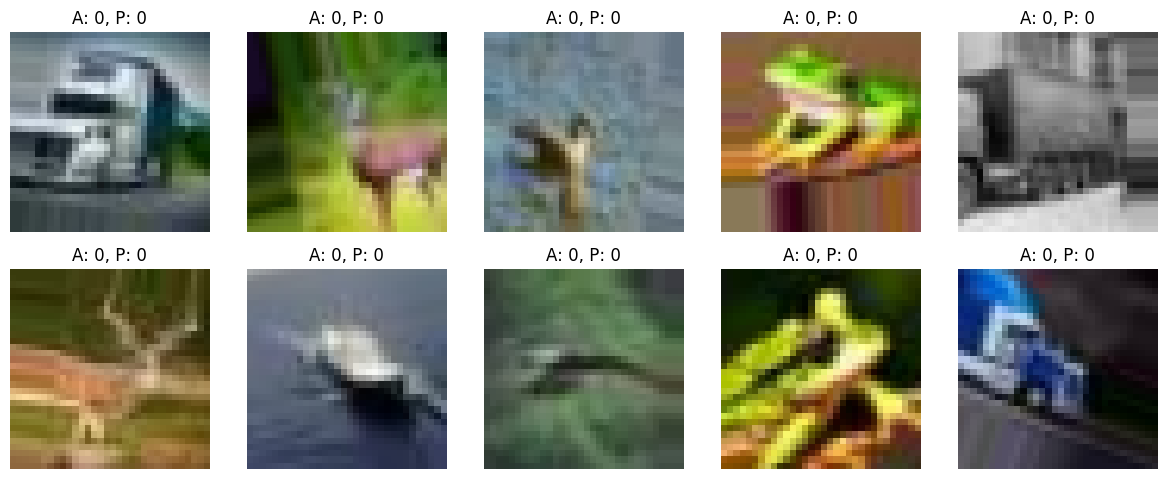

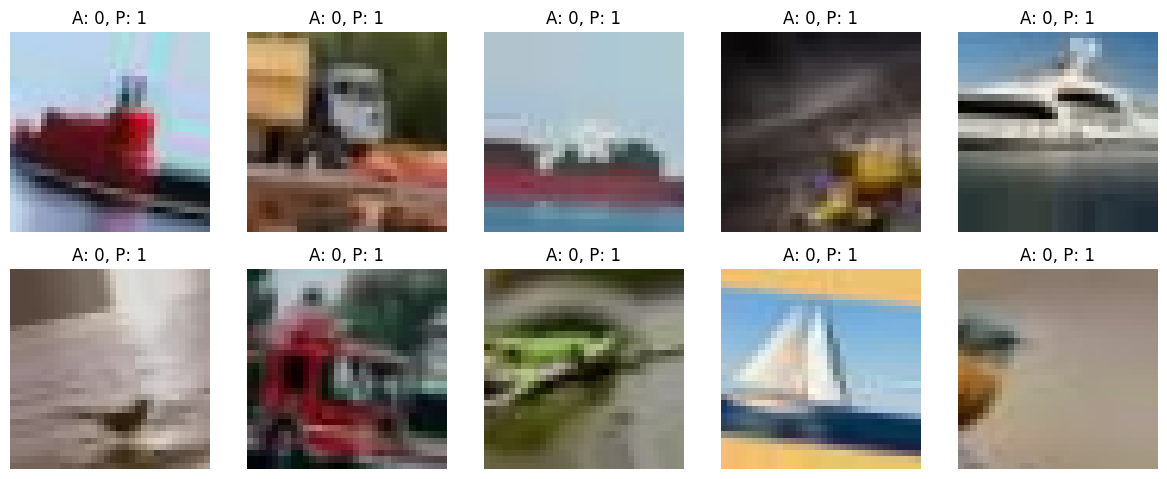

In [ ]:
def display_images(images, actual_labels, predicted_labels):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"A: {actual_labels[i]}, P: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

correct_indices = np.where(predicted_classes == test_labels)[0]
misclassified_indices = np.where(predicted_classes != test_labels)[0]

sample_correct_images = [test_data_gen[i][0][0] for i in correct_indices[:10]]
sample_correct_labels = [test_labels[i] for i in correct_indices[:10]]
sample_predicted_correct = [predicted_classes[i] for i in correct_indices[:10]]

display_images(sample_correct_images, sample_correct_labels, sample_predicted_correct)

sample_misclassified_images = [test_data_gen[i][0][0] for i in misclassified_indices[:10]]
sample_misclassified_labels = [test_labels[i] for i in misclassified_indices[:10]]
sample_predicted_misclassified = [predicted_classes[i] for i in misclassified_indices[:10]]

display_images(sample_misclassified_images, sample_misclassified_labels, sample_predicted_misclassified)

In [ ]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

def poison_data(original_images, original_labels, poison_rate=0.1):
    """
    Induce label flipping poisoning attack on the dataset.

    Parameters:
    - original_images: Original training images
    - original_labels: Original training labels
    - poison_rate: Proportion of data to poison

    Returns:
    - poisoned_images: The images after poisoning
    - poisoned_labels: The labels after poisoning
    """
    num_samples = len(original_labels)
    num_poison = int(num_samples * poison_rate)

    poison_indices = np.random.choice(num_samples, num_poison, replace=False)

    poisoned_labels = np.copy(original_labels)
    for index in poison_indices:
        poisoned_labels[index] = 1 - poisoned_labels[index]

    return original_images, poisoned_labels

def load_images_from_folder(folder, img_size=(32, 32)):
    """
    Load images from a folder and resize them.

    Parameters:
    - folder: Directory containing images.
    - img_size: Desired size to which images will be resized.

    Returns:
    - images: List of image arrays.
    - labels: List of labels.
    """
    images = []
    labels = []

    for label_name in ['REAL', 'FAKE']:
        label_folder = os.path.join(folder, label_name)
        label = 0 if label_name == 'REAL' else 1
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dataset_folder = '/content/cifake_dataset'

train_folder = os.path.join(dataset_folder, 'train')
train_images, train_labels = load_images_from_folder(train_folder, img_size=(32, 32))

train_images = train_images.astype(np.float32) / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

poison_rate = 0.8
poisoned_images, poisoned_labels = poison_data(train_images, train_labels, poison_rate)

augmented_images = np.concatenate((train_images, poisoned_images))
augmented_labels = np.concatenate((train_labels, poisoned_labels))

poisoned_data_gen = tf.data.Dataset.from_tensor_slices((augmented_images, augmented_labels)).batch(64)

test_folder = os.path.join(dataset_folder, 'test')
test_images, test_labels = load_images_from_folder(test_folder, img_size=(32, 32))

test_images = test_images.astype(np.float32) / 255.0

model = create_model()

test_data_gen = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

history_poisoned = model.fit(poisoned_data_gen, epochs=10, validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_data_gen)
print(f'Test accuracy after training on poisoned data: {test_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 250s 98ms/step - accuracy: 0.7871 - loss: 0.4419 - val_accuracy: 0.1262 - val_loss: 1.2054
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 241s 96ms/step - accuracy: 0.8277 - loss: 0.3680 - val_accuracy: 0.1006 - val_loss: 1.2924
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 266s 98ms/step - accuracy: 0.8502 - loss: 0.3234 - val_accuracy: 0.0952 - val_loss: 1.3098
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 242s 97ms/step - accuracy: 0.8630 - loss: 0.2994 - val_accuracy: 0.0905 - val_loss: 1.3551
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 264s 98ms/step - accuracy: 0.8736 - loss: 0.2818 - val_accuracy: 0.0918 - val_loss: 1.3538
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 259s 96ms/step - accuracy: 0.8825 - loss: 0.2619 - val_accuracy: 0.0908 - val_loss: 1.3973
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 258s 95ms/step - accuracy: 0.8918 - loss: 0.2458 - val_accuracy: 0.0932 - val_loss: 1.3979
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 237s 95ms/step - accuracy: 

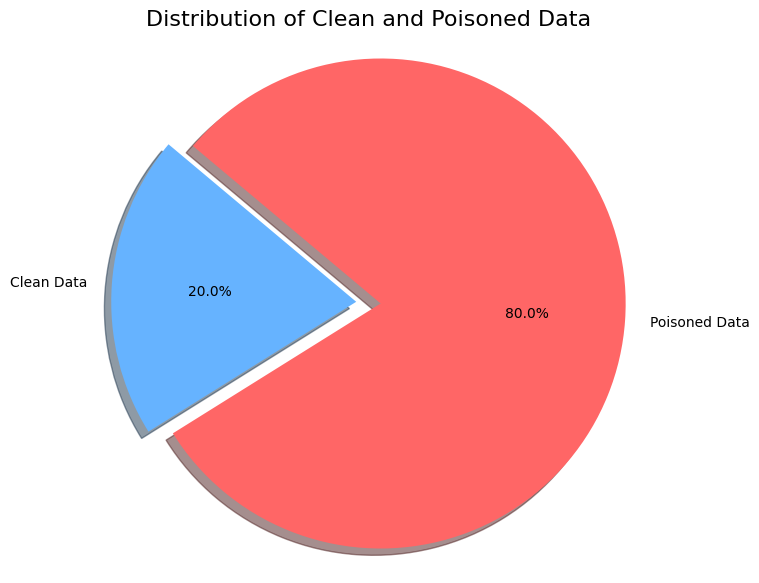

In [ ]:
import matplotlib.pyplot as plt

total_samples = len(train_labels)
num_poisoned = int(total_samples * poison_rate)
num_clean = total_samples - num_poisoned

labels = ['Clean Data', 'Poisoned Data']
sizes = [num_clean, num_poisoned]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)
plt.title('Distribution of Clean and Poisoned Data', fontsize=16)
plt.axis('equal')
plt.show()


In [ ]:
test_acc1=91.83

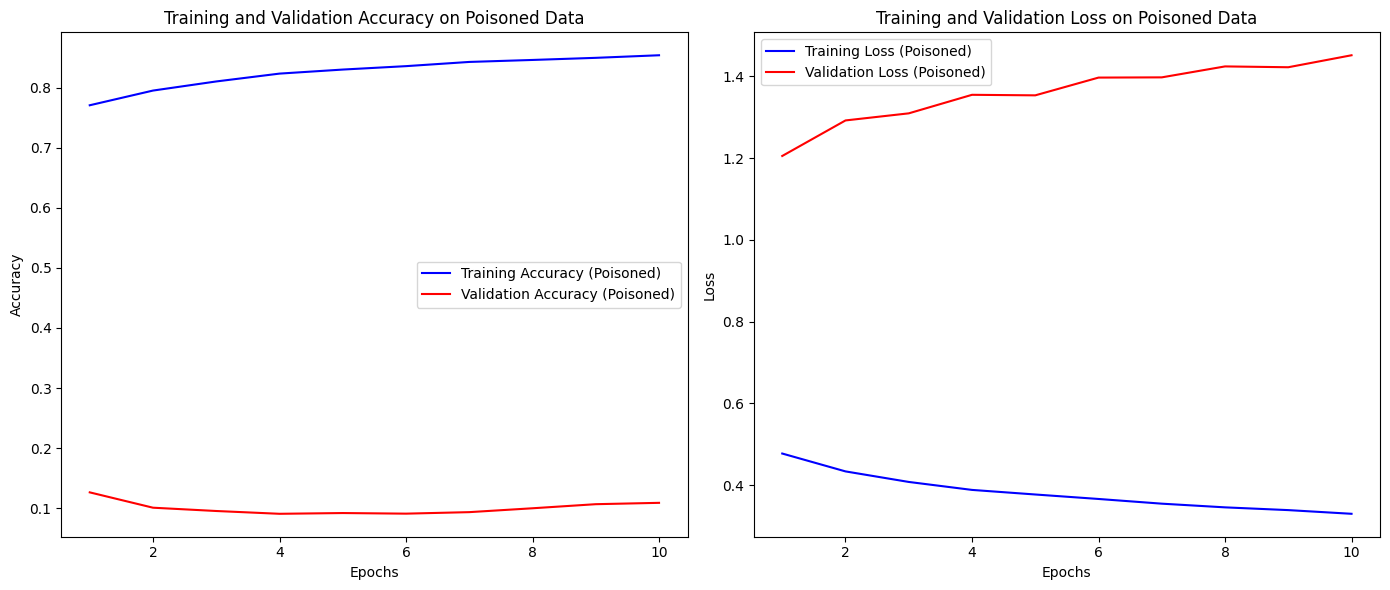

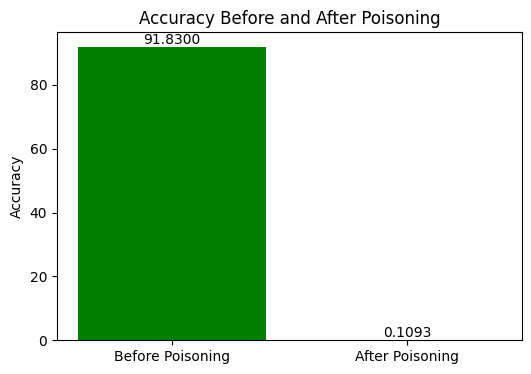

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(original_acc, poisoned_acc, history_poisoned):
    train_acc = history_poisoned.history['accuracy']
    val_acc = history_poisoned.history['val_accuracy']

    train_loss = history_poisoned.history['loss']
    val_loss = history_poisoned.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy (Poisoned)')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy (Poisoned)')
    plt.title('Training and Validation Accuracy on Poisoned Data')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss (Poisoned)')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss (Poisoned)')
    plt.title('Training and Validation Loss on Poisoned Data')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    bars = plt.bar(['Before Poisoning', 'After Poisoning'], [original_acc, poisoned_acc], color=['green', 'red'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

    plt.title('Accuracy Before and After Poisoning')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy_comparison(test_acc1, test_acc, history_poisoned)


In [ ]:
from sklearn.ensemble import IsolationForest
from tensorflow.keras import models
import numpy as np

def sanitize_data(images, labels, contamination_rate=0.1):
    """
    Sanitize data by identifying and removing anomalies using Isolation Forest.

    Parameters:
    - images: Array of image data.
    - labels: Corresponding labels for the images.
    - contamination_rate: Expected proportion of anomalies.

    Returns:
    - clean_images: Sanitized image data.
    - clean_labels: Corresponding labels for the sanitized images.
    """
    feature_extractor = models.Sequential(model.layers[:-1])
    features = feature_extractor.predict(images)

    # Use Isolation Forest for anomaly detection
    detector = IsolationForest(contamination=contamination_rate, random_state=42)
    predictions = detector.fit_predict(features)  # -1 indicates anomalies

    clean_images = images[predictions != -1]
    clean_labels = labels[predictions != -1]
    return clean_images, clean_labels

clean_train_images, clean_train_labels = sanitize_data(train_images, train_labels)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step


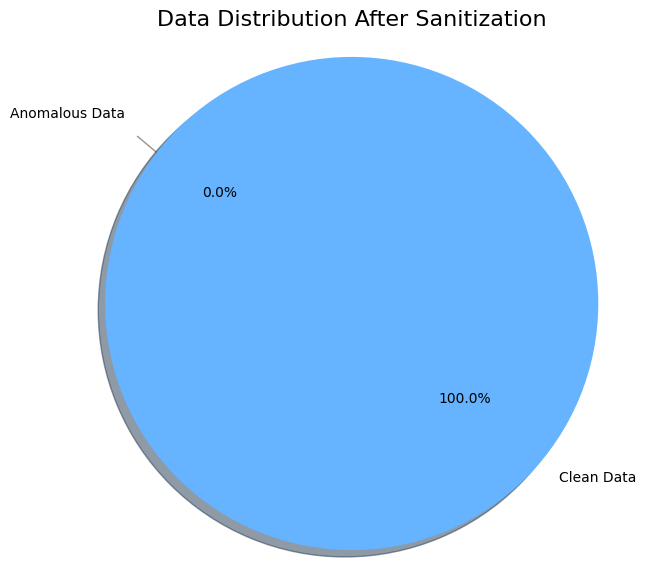

In [ ]:
num_clean = np.sum(predictions != -1)
num_anomalous = np.sum(predictions == -1)

labels = ['Clean Data', 'Anomalous Data']
sizes = [num_clean, num_anomalous]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Distribution After Sanitization', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

def create_model_with_smoothing():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_with_smoothing = create_model_with_smoothing()
history = model_with_smoothing.fit(
    clean_train_images, clean_train_labels,
    epochs=10, batch_size=64, validation_data=(val_images, val_labels)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 116s 101ms/step - accuracy: 0.7765 - loss: 0.4561 - val_accuracy: 0.8866 - val_loss: 0.2730
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - accuracy: 0.8885 - loss: 0.2691 - val_accuracy: 0.8994 - val_loss: 0.2490
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 115s 102ms/step - accuracy: 0.9087 - loss: 0.2261 - val_accuracy: 0.9142 - val_loss: 0.2124
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step - accuracy: 0.9198 - loss: 0.1976 - val_accuracy: 0.9236 - val_loss: 0.1942
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 144s 105ms/step - accuracy: 0.9305 - loss: 0.1722 - val_accuracy: 0.9265 - val_loss: 0.1868
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 136s 99ms/step - accuracy: 0.9389 - loss: 0.1542 - val_accuracy: 0.9294 - val_loss: 0.1839
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 145s 102ms/step - accuracy: 0.9469 - loss: 0.1360 - val_accuracy: 0.9269 - val_loss: 0.1870
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 141s 101ms/step - acc

In [ ]:
test_images = test_images.astype(np.float32) / 255.0

test_loss, test_acc = model_with_smoothing.evaluate(test_images, test_labels)
print(f"Test accuracy on clean data: {test_acc:.4f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8456 - loss: 2.3992
Test accuracy on clean data: 0.5000


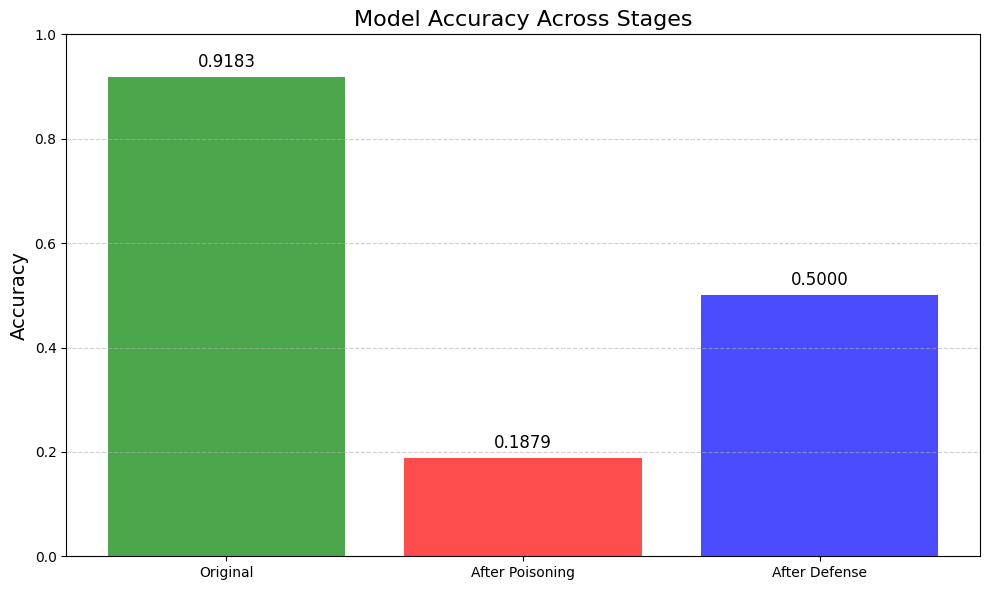

In [ ]:
import matplotlib.pyplot as plt

original_accuracy = 0.91830
poisoned_accuracy = 0.1879
defense_accuracy = test_acc

stages = ['Original', 'After Poisoning', 'After Defense']
accuracies = [original_accuracy, poisoned_accuracy, defense_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(stages, accuracies, color=['green', 'red', 'blue'], alpha=0.7)

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{acc:.4f}', ha='center', fontsize=12)

plt.title('Model Accuracy Across Stages', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [1]:
!git clone https://github.com/Nidhicodes/AI-image-detect-with-defense-against-poisonous-data.git

Cloning into 'AI-image-detect-with-defense-against-poisonous-data'...


In [5]:
!cp /content/AI-detect.ipynb /content/AI-image-detect-with-defense-against-poisonous-data/


cp: cannot stat '/content/AI-detect.ipynb': No such file or directory
